### Cho dữ liệu như xclare.csv
1. Đọc dữ liệu, chuẩn hóa dữ liệu nếu cần
2. Dùng dendrogram để xác định số nhóm/cụm
3. Áp dụng thuật toán
4. Trực quan hóa kết quả, nhận xét
5. Cho X_test = np.array([[20, 20], [40,60], [70,5]]), cho biết những phần tử này thuộc cụm nào?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("../../Data/xclara.csv", sep=",")
print(data.shape)
data.head()

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


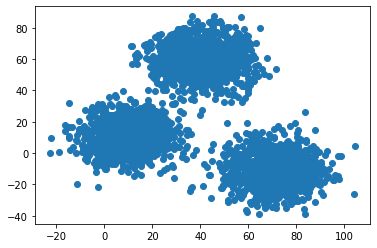

In [3]:
plt.scatter(data.V1, data.V2)

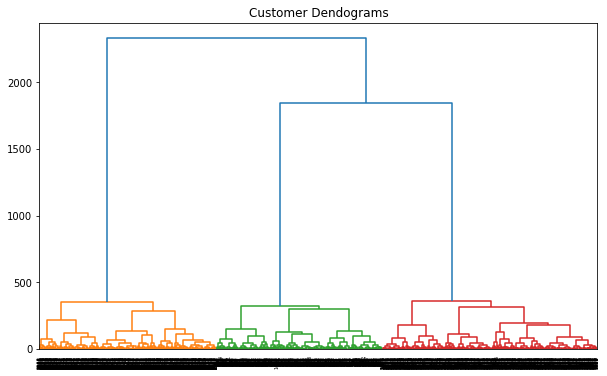

In [4]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,6))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))
plt.show()

In [5]:
# cluster = 3
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3,
affinity='euclidean',
linkage='ward')

cluster.fit(data)

AgglomerativeClustering(n_clusters=3)

In [6]:
cluster.labels_

array([2, 2, 2, ..., 1, 1, 1], dtype=int64)

In [7]:
X_test = np.array([[20, 20], [40,60], [70,5]])

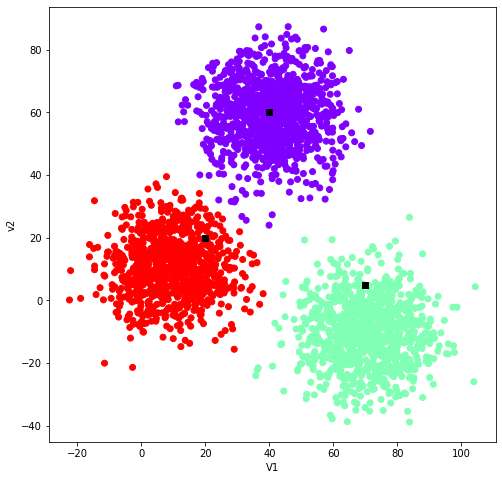

In [8]:
plt.figure(figsize=(8,8))

plt.scatter(data.V1, data.V2, c=cluster.labels_, cmap='rainbow')
plt.scatter(X_test[:,0],X_test[:,1], color="black", marker='s')
plt.xlabel("V1")
plt.ylabel("v2")
plt.show()